In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_496.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_5003.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_5942.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_6258.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_2162.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_8021.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_7693.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_4010.jpeg
/kaggle/input/rea

In [2]:
import tensorflow as tf
import keras
import seaborn as sns

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [3]:
#import train data
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,horizontal_flip = True,
                                   vertical_flip =  True , 
                                   rotation_range=60,
                                   brightness_range = (0.4, 1.4))


train_generator = train_datagen.flow_from_directory('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train',
                                                 batch_size =32,
                                               target_size = (244, 244),
                                               color_mode = 'grayscale',
                                                 class_mode='binary',
                                               classes = {"ok_front": 0, "def_front":1},
                                                 shuffle=True,seed=1)


test_datagen = ImageDataGenerator(rescale = 1/255)



test_generator = test_datagen.flow_from_directory("../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test",
                                                           batch_size=32,
                                                           target_size=(244,244),
                                                          color_mode = "grayscale", 
                                             class_mode='binary',
                                             classes = {"ok_front": 0, "def_front":1},
                                                           shuffle=False)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


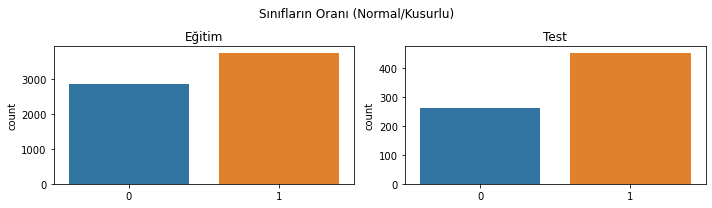

In [4]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.countplot(train_generator.classes,ax=ax[0])
sns.countplot(test_generator.classes,ax=ax[1])

ax[0].set_title('Eğitim')
ax[1].set_title('Test')


fig.suptitle('Sınıfların Oranı (Normal/Kusurlu)')
fig.tight_layout(rect=[0, 0.03, 1, 0.92]);

ok_front


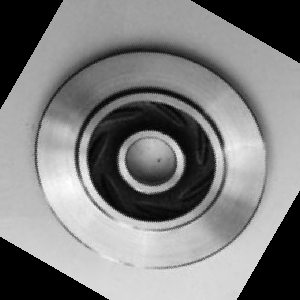

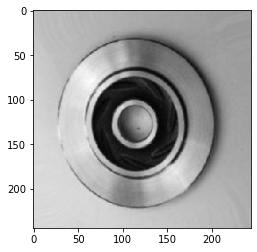

In [5]:
#ok_front example
image_path = "../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/ok_front/cast_ok_0_1019.jpeg"
new_img = image.load_img(image_path, target_size=(244, 244))
print("ok_front")
plt.imshow(new_img)

from PIL import Image
from IPython.display import display
path = '../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/ok_front/cast_ok_0_1019.jpeg'
img = Image.open(path)
img = img.rotate(60) # 90, -90, 180, ...
display(img)
#img.save('ok_front_exapmle.jpeg')

def_front


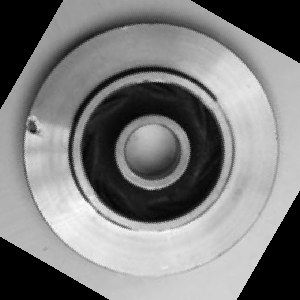

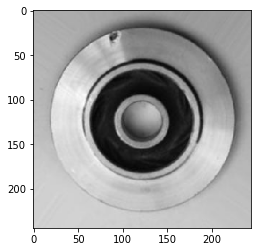

In [6]:
#def example
image_path = "/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/def_front/cast_def_0_2425.jpeg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("def_front")
plt.imshow(new_img);
from PIL import Image
from IPython.display import display
path = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/def_front/cast_def_0_2425.jpeg'
img = Image.open(path)
img = img.rotate(60) # 90, -90, 180, ...
display(img)
#img.save('ok_front_exapmle.jpeg')

In [7]:
model = keras.models.Sequential([

keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides = 2, activation="relu", 
                        padding="same", input_shape=(244, 244, 1)),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2),
        
keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2),
                
keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2),
                
keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2),
        
keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same"),
keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2),
                
keras.layers.Flatten(),
keras.layers.Dense(units=64, activation="relu"),

keras.layers.Dropout(0.2),

keras.layers.Dense(units=1, activation="sigmoid")

    ])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [9]:
history=model.fit(
        train_generator,
        steps_per_epoch=207,
        epochs=10)

Epoch 1/10
207/207 [==============================] - 101s 486ms/step - loss: 0.6870 - accuracy: 0.5654
Epoch 2/10
207/207 [==============================] - 45s 217ms/step - loss: 0.5960 - accuracy: 0.6646
Epoch 3/10
207/207 [==============================] - 45s 218ms/step - loss: 0.4816 - accuracy: 0.7728
Epoch 4/10
207/207 [==============================] - 45s 216ms/step - loss: 0.3613 - accuracy: 0.8467
Epoch 5/10
207/207 [==============================] - 45s 219ms/step - loss: 0.2832 - accuracy: 0.8858
Epoch 6/10
207/207 [==============================] - 45s 215ms/step - loss: 0.2382 - accuracy: 0.9093
Epoch 7/10
207/207 [==============================] - 45s 218ms/step - loss: 0.2098 - accuracy: 0.9149
Epoch 8/10
207/207 [==============================] - 45s 217ms/step - loss: 0.1867 - accuracy: 0.9282
Epoch 9/10
207/207 [==============================] - 46s 222ms/step - loss: 0.1613 - accuracy: 0.9394
Epoch 10/10
207/207 [==============================] - 46s 221ms/step - 

dict_keys(['loss', 'accuracy'])


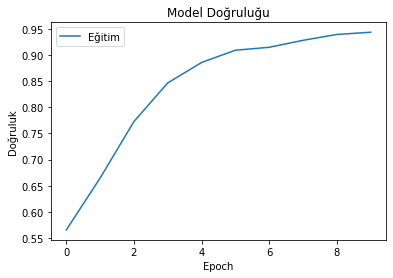

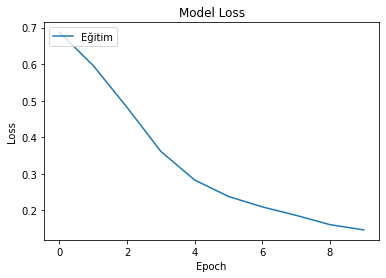

In [10]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()

In [11]:
y_prediction =  model.predict(test_generator)
y_prediction =  np.argmax(y_prediction,axis = 1 )

#print(y_prediction)

In [12]:
def ensemble_prediction(generator):
    y_probs = [model.predict(generator).squeeze()]
    return np.mean(np.array(y_probs), axis=0)

In [13]:
import sklearn
y_probs = ensemble_prediction(test_generator)

y = test_generator.classes
y_pred = y_probs>0.5

print(f'Accuracy:{sklearn.metrics.accuracy_score(y, y_pred):.4}')
print('------------------------------')
print('Confusion matrix:')
print(sklearn.metrics.confusion_matrix(y, y_pred))

Accuracy:0.9734
------------------------------
Confusion matrix:
[[250  12]
 [  7 446]]
